# AGE_Detection

## Importing Library

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Data

In [2]:
df= pd.read_csv('train.csv',dtype=str)
df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19906 entries, 0 to 19905
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      19906 non-null  object
 1   Class   19906 non-null  object
dtypes: object(2)
memory usage: 311.2+ KB


In [4]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Age_Detection\\DataSet\\Train'

In [5]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)

## Train Data

In [6]:
train_itt=datagen.flow_from_dataframe(dataframe=df,directory=train_dir,batch_size=64,
                                     x_col='ID',y_col='Class',target_size=(100, 100),
                                     subset='training')
val_itt=datagen.flow_from_dataframe(dataframe=df,directory=train_dir,batch_size=64,x_col='ID',y_col='Class'
                                   ,target_size=(100,100),subset='validation')

Found 14930 validated image filenames belonging to 3 classes.
Found 4976 validated image filenames belonging to 3 classes.


In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten

In [8]:
model= Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(3,activation='softmax'))

In [9]:
#model.compile(optimizer='rmsprop',loss="categorical_crossentropy",metrics=["accuracy"])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
model.fit(train_itt,validation_data=val_itt,epochs=6)

Epoch 1/6
234/234 [==============================] - 823s 4s/step - loss: 0.8861 - accuracy: 0.6344 - val_loss: 0.7742 - val_accuracy: 0.6614
Epoch 2/6
234/234 [==============================] - 246s 1s/step - loss: 0.7217 - accuracy: 0.6871 - val_loss: 0.7050 - val_accuracy: 0.6889
Epoch 3/6
234/234 [==============================] - 231s 985ms/step - loss: 0.6498 - accuracy: 0.7176 - val_loss: 0.6672 - val_accuracy: 0.7096
Epoch 4/6
234/234 [==============================] - 212s 904ms/step - loss: 0.5836 - accuracy: 0.7529 - val_loss: 0.6422 - val_accuracy: 0.7235
Epoch 5/6
234/234 [==============================] - 210s 898ms/step - loss: 0.4956 - accuracy: 0.7942 - val_loss: 0.6359 - val_accuracy: 0.7245
Epoch 6/6
234/234 [==============================] - 238s 1s/step - loss: 0.3946 - accuracy: 0.8432 - val_loss: 0.7086 - val_accuracy: 0.7241


<AxesSubplot:>

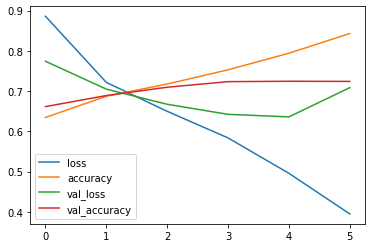

In [12]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [14]:
class_label= train_itt.class_indices
class_label

{'MIDDLE': 0, 'OLD': 1, 'YOUNG': 2}